# Setup

In [1]:
%cd ..

/home/pdona/VariousExercises/SentimentAnalysisAmazonMerchant


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from ProductReviewScraper.models import Review, Product
import ProductReviewScraper.amazon_review_database as db

# Load data from datatabase

In [4]:
df = pd.read_sql(
    db.session.query(
        Product, Review).filter(Review.product_id == Product.id).statement,
    con=db.engine
)

df.drop(['id', 'id_1', 'product_id'],
        axis='columns', inplace=True)
df.columns = ['product_asin', 'product_name',  'product_imageurl',
              'product_price', 'product_global_rating', 'review_amazonid',
              'review_user', 'review_rating', 'review_title',
              'review_date', 'review_verified', 'review_foreign',
              'review_content', 'review_helpful_vote']
dftmp = df.copy()
df = None

We keep only reviews written in english and we drop automatic translations

In [5]:
df = dftmp[dftmp["review_foreign"] == False].copy()
df.drop(['review_foreign'],
        axis='columns', inplace=True)


There is a strange cap at 5K reviews - To investigate. 
The products are alla more or less the same and they are priced in a 15$ window. 
It make sense to analyze them as a group.

In [40]:
import unidecode
df["review_content"] = df["review_content"].apply(unidecode.unidecode)
df["review_title"] = df["review_title"].apply(unidecode.unidecode)
df["product_name"] = df["product_name"].apply(unidecode.unidecode)


# Basic EDA

The reviews are scraped from Amazon.com therefore are US centric. Keep it in mind.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61294 entries, 0 to 63616
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_asin           61294 non-null  object 
 1   product_name           61294 non-null  object 
 2   product_imageurl       61294 non-null  object 
 3   product_price          61294 non-null  float64
 4   product_global_rating  61294 non-null  int64  
 5   review_amazonid        61294 non-null  object 
 6   review_user            61294 non-null  object 
 7   review_rating          61294 non-null  int64  
 8   review_title           61294 non-null  object 
 9   review_date            61294 non-null  object 
 10  review_verified        61294 non-null  bool   
 11  review_content         61294 non-null  object 
 12  review_helpful_vote    61294 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 6.1+ MB


There are no missing data. We scraped the reviews carefully.

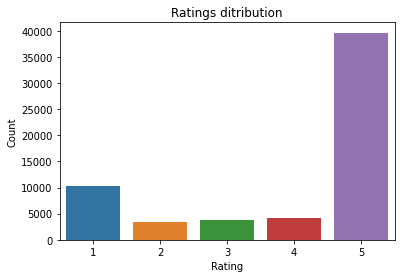

In [8]:
ax = sns.countplot(data=df, x="review_rating")
ax.set(title="Ratings ditribution", xlabel="Rating", ylabel="Count");


The global (cumulative) rating distribution is typical of amazon products. There is a large excess of positive ratings. The reviews are often polarized (1 and 5 are preferred).

In [9]:
df["product_asin"].unique()

array(['B000X457HO', 'B08TZ75LLK', 'B000WQY7RO', 'B000WUFVR0',
       'B004G9C0SQ', 'B000JDGC78', 'B001L2MD2E', 'B001U40C6W',
       'B000W3V8S8', 'B004TAY2Q0', 'B07F7TWGGC', 'B07Y92C59V',
       'B000TVJ6XW', 'B000WQZ5PC', 'B000P6THK8', 'B006QOK0ZY',
       'B004G9DV66', 'B01N68CWKV', 'B001D6HB0M', 'B07144XJDK',
       'B003U24B7S', 'B06X6H95GW', 'B0002PW0WO', 'B01MTS599T'],
      dtype=object)

In [10]:
df["product_name"].unique()


array(['Yankee Candle Large Jar Candle Vanilla Cupcake',
       'Yankee Candle Vanilla Crème Brulée Signature Large Tumbler Candle, Large 2-Wick Tumbler',
       'Yankee Candle Large Jar Candle Lilac Blossoms',
       'Yankee Candle Large Jar Candle Home Sweet Home',
       'Yankee Candle Large Jar Candle Pink Sands',
       'Yankee Candle Large Jar Candle Balsam & Cedar',
       'Yankee Candle Large Jar Candle Sparkling Cinnamon',
       'Yankee Candle Large Jar Candle, Red Apple Wreath',
       'Yankee Candle Large Jar Candle Spiced Pumpkin',
       'Yankee Candle Large 2-Wick Tumbler Candle, Mountain Lodge',
       'Yankee Candle Scented Candle, Large 2-Wick Tumbler, Icy Blue',
       'Yankee Candle Large Jar 2 Wick White Fir Scented Tumbler Premium Grade Candle Wax with up to 110 Hour Burn Time',
       'Yankee Candle Large Jar Candle, Autumn Wreath',
       'Yankee Candle 1073481EZ Large Jar Candle Lemon Lavender',
       'Yankee Candle Large Jar Candle Sage & Citrus',
       'Yan

In [11]:
len(df["product_name"].unique())


24

In [37]:
import unidecode

In [39]:
import unidecode
list(df.sample(100)["review_content"].apply(unidecode.unidecode))


['Did not hold sent.',
 'A+',
 'This company should be ashamed of themselves! These candles no longer have any fragrance and its sad they are still allow to sell this trash. DO NOT BUY IT!',
 'Gift recipient was very happy',
 'Makes the whole house smell great!! Love it! [?]',
 'I bought this for a co workers birthday.',
 'Product is great and smell is wonderful filling up a whole room',
 'Nice candle that smells great!',
 'I bought this candle at an amazing price. It burned evenly and lasted a long time. Awesome scent.',
 'This is my favorite scent. Smells like real purple lilacs! Great to have because unfortuanately the real lilacs only stay in bloom about a week or so. Now I can enjoy the smell all year long if i want!',
 "I was not happy with this candle..I use to buy Yankee Candles all the time years ago and the scent was stronger and I was pleased with them..This candle had a very little scent to it..YankeeQuality isn't there anymore..",
 'Smells good',
 'Item as described. Great

We scaped 61294 reviews. For 24 unique products the majority are variations of **Yankee Candle Large Jar Candle**

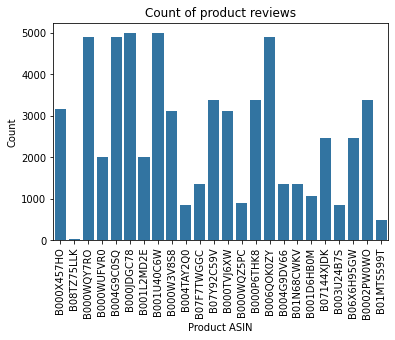

In [12]:
ax = sns.countplot(data=df, x="product_asin", color=sns.color_palette()[0])
ax.set(title="Count of product reviews", xlabel="Product ASIN", ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


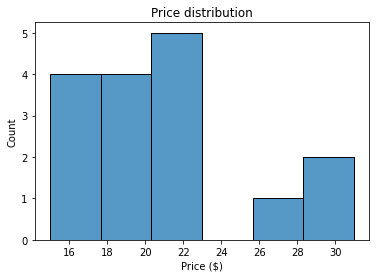

In [13]:
ax=sns.histplot(data=df["product_price"].unique())
ax.set(title="Price distribution", xlabel="Price ($)", ylabel="Count");

In [14]:
def translate(b:bool)->str:
    return "Yes" if b else "No"

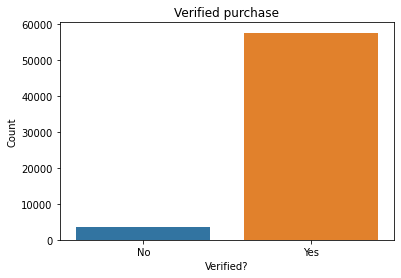

In [15]:
ax = sns.countplot(data=df, x="review_verified")
ax.set(title="Verified purchase", xlabel="Verified?", ylabel="Count")
ax.set_xticklabels(["Yes" if l.get_text()=="True" else "No" for l in list(ax.get_xticklabels())]);

The distribution of the reviews with a verified purchase is also very typical of Amazon.com products.

In [16]:
df["review_is_helpful"] = df["review_helpful_vote"].apply(lambda x : x > 0)


To study the helpful vote distribution we transform the feature to categorical (the majority of reviews are NOT helpful)

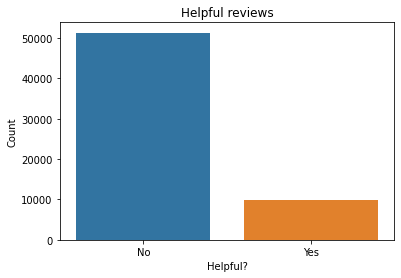

In [17]:
ax = sns.countplot(data=df, x="review_is_helpful")
ax.set(title="Helpful reviews", xlabel="Helpful?", ylabel="Count")
ax.set_xticklabels(["Yes" if l.get_text() == "True" else "No" for l in list(ax.get_xticklabels())]);

Only approximately the 17% of reviews are voted as helpful but the clients

In [18]:
nrev = df.query("review_rating<3")

In [19]:
def find_smell(review)->bool:
    return any(x in str(review).lower() for x in ('scent', 'smell', 'odor'))


In [20]:
smell = nrev[nrev["review_content"].apply(
    find_smell) | nrev["review_title"].apply(find_smell)].copy()


In [21]:
smell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 63611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_asin           9359 non-null   object 
 1   product_name           9359 non-null   object 
 2   product_imageurl       9359 non-null   object 
 3   product_price          9359 non-null   float64
 4   product_global_rating  9359 non-null   int64  
 5   review_amazonid        9359 non-null   object 
 6   review_user            9359 non-null   object 
 7   review_rating          9359 non-null   int64  
 8   review_title           9359 non-null   object 
 9   review_date            9359 non-null   object 
 10  review_verified        9359 non-null   bool   
 11  review_content         9359 non-null   object 
 12  review_helpful_vote    9359 non-null   int64  
 13  review_is_helpful      9359 non-null   bool   
dtypes: bool(2), float64(1), int64(3), object(8)
memory usag

In [22]:
smell['review_date'] = pd.to_datetime(smell['review_date'])


In [23]:
smellw=smell.groupby(pd.Grouper(key='review_date', freq='W')).count()


In [24]:
smellt=smellw[smellw.index.year >2015]


<AxesSubplot:xlabel='review_date', ylabel='review_rating'>

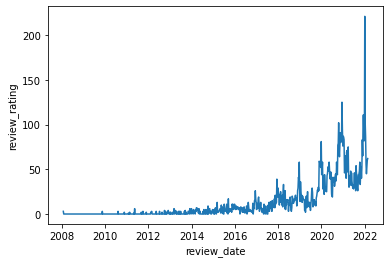

In [25]:
sns.lineplot(x=smellw.index, y=smellw['review_rating'])


<AxesSubplot:xlabel='review_date', ylabel='review_rating'>

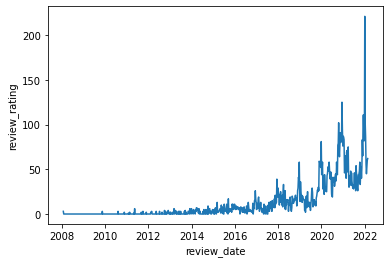

In [26]:
sns.lineplot(x=smellw.index, y=smellw['review_rating'])


In [27]:
miny = smell['review_date'].min().year
maxy = smell['review_date'].max().year


In [29]:
tmp = []
for year in range(2016,2022):
        tempdf = smellw[(smellw.index.year == year)]
        tot = tempdf['review_rating'].sum()
        tmp.append(tempdf['review_rating']/tot)



In [30]:
tmpsmell=pd.concat(tmp,axis="rows")

<AxesSubplot:xlabel='review_date', ylabel='review_rating'>

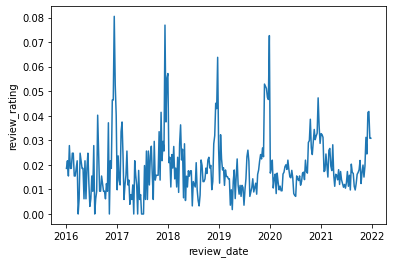

In [31]:
sns.lineplot(x=tmpsmell.index, y=tmpsmell)


In [32]:
tmpsmell2=tmpsmell.rolling(window=7).mean()


<AxesSubplot:xlabel='review_date', ylabel='review_rating'>

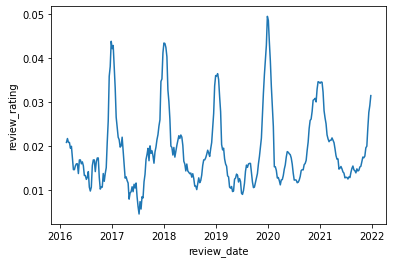

In [33]:
sns.lineplot(x=tmpsmell2.index, y=tmpsmell2)
